In [1]:
!python3 -m pip install Tweepy
!python3 -m pip install pandas
!pip install nltk
!pip install textblob
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('words')
nltk.download("stopwords")
nltk.download('omw-1.4')

Successful Authentication


In [3]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from textblob import Word
import tweepy
import pandas as pd
import os

In [ ]:
api_key = "xxxx"
api_key_secret = "xxxx"
access_key = "xx-xx"
access_key_secret = "xxxx"
        

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_key,access_key_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

try:
    api.verify_credentials()
    print('Successful')
except:
    print('Failed')

In [6]:
df = pd.DataFrame(columns=['text', 'source', 'created_at'])
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search_tweets, q='#türkiye', lang='tr', since_id='2022-01-01').items(2000):
    msg = [tweet.text, tweet.source, tweet.created_at] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)
df.columns = ['text', 'source', 'created_at']

## tweet çekmeden aşagıdan devam edilebilir

In [7]:
df.to_csv('testnw.csv')

In [101]:
data = pd.read_csv("testnw.csv",delimiter=',')
print(data.head())

   Unnamed: 0                                               text  \
0           0  “Sübhânallâhi adede halkıhî, sübhânallâhi rızâ...   
1           1  Antik Mısır Matematiği ve Mısır Medeniyetinin ...   
2           2  RT @yeryuzukolej: #Antalya #Türkiye #lgs #lgs2...   
3           3  @_FenerTeam #Fenerbahce #tuerkiye https://t.co...   
4           4  #profil #ekle #İstanbul #türkiye #levent #masl...   

                source                                 Xurl  
0                IFTTT                    https://ifttt.com  
1    Mühendis Beyinler      http://www.muhendisbeyinler.net  
2  Twitter for Android  http://twitter.com/download/android  
3   Twitter for iPhone   http://twitter.com/download/iphone  
4      Twitter Web App           https://mobile.twitter.com  


## veri temizligi

In [8]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
sw = stopwords.words('turkish')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

/tmp/ipykernel_3545/643921938.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
/tmp/ipykernel_3545/643921938.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d','')


In [9]:
#df.head()
#df.to_csv('trainclear.csv')

,text,source,created_at
0,devlet töre tevhit turan türkiye milliyetçi_ha...,Twitter for Android,2022-09-04 18:47:02+00:00
1,rt utepgm utep yerli yerinde üret dünyaya sat ...,Twitter for Android,2022-09-04 18:46:49+00:00
2,alperen şengün harbiden değişik uşak yaa cedi ...,Twitter for iPhone,2022-09-04 18:46:12+00:00
3,rt harunozer_ vatanını seven vatanına değer ka...,Twitter for Android,2022-09-04 18:45:45+00:00
4,ülke olarak kendimizi büyütüyoruz alanda türk ...,Twitter for iPhone,2022-09-04 18:45:37+00:00


In [38]:
#seyrek kelimeleri belirliyorum ve data dan siliyorum

textss = " ".join(df['text'])
textss = textss.split()
print(len(textss))

24852


In [39]:
freqquency = pd.Series(textss).value_counts()

In [40]:
freqquency = freqquency[:20]

In [41]:
freqquency

bir           382
ucuz          134
değil         110
güzel         105
türkiyede      96
ankara         90
su             89
sahip          88
rterdogan      85
taşıyan        85
yunanistan     85
peygamberi     84
koruyan        84
örümcek        84
ibrahimin      84
ateşine        84
damla          84
karınca        84
oldukları      84
güce           84
dtype: int64

In [42]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

                                                text               source  \
0  devlet töre tevhit turan milliyetçi_hareket hu...  Twitter for Android   
1  utepgm utep yerli yerinde üret dünyaya sat fel...  Twitter for Android   
2  alperen şengün harbiden değişik uşak yaa cedi ...   Twitter for iPhone   
3  harunozer_ vatanını seven vatanına değer katan...  Twitter for Android   
4  ülke olarak kendimizi büyütüyoruz alanda türk ...   Twitter for iPhone   

                 created_at  
0 2022-09-04 18:47:02+00:00  
1 2022-09-04 18:46:49+00:00  
2 2022-09-04 18:46:12+00:00  
3 2022-09-04 18:45:45+00:00  
4 2022-09-04 18:45:37+00:00  


In [28]:
freqquency = pd.Series(textss).value_counts()
freqquency = freqquency[-170:]
print(freqquency)

httpstcohvenewehgq    1
babala                1
saygı                 1
fazlasını             1
httpstcoqotlgbxo      1
                     ..
kursu                 1
kayıtlarımız          1
iletişim              1
bilgilendirme         1
httpstcoazryuproci    1
Length: 170, dtype: int64


In [29]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

                                                text               source  \
0  devlet töre tevhit turan milliyetçi_hareket hu...  Twitter for Android   
1  utepgm utep yerli yerinde üret dünyaya sat fel...  Twitter for Android   
2  alperen şengün harbiden değişik uşak yaa cedi ...   Twitter for iPhone   
3  harunozer_ vatanını seven vatanına değer katan...  Twitter for Android   
4  ülke olarak kendimizi büyütüyoruz alanda türk ...   Twitter for iPhone   

                 created_at  
0 2022-09-04 18:47:02+00:00  
1 2022-09-04 18:46:49+00:00  
2 2022-09-04 18:46:12+00:00  
3 2022-09-04 18:45:45+00:00  
4 2022-09-04 18:45:37+00:00  


In [30]:
#worldcloud deneme
!pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


     |████████████████████████████████| 458 kB 1.0 MB/s eta 0:00:01


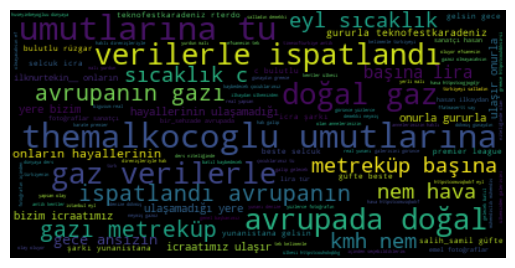

In [43]:
text = " ".join(df['text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

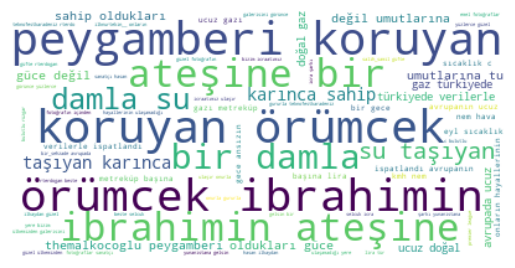

In [34]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [35]:
wordcloud.to_file("kelime_bulutu.png");